## PROJETO FINAL CIENTISTA DE DADOS: 

- Contexto do projeto, a instituição financeira que você foi contratado possui uma taxa de inadimplência de 35%. O se

## 1. Chamando as bibliotecas que serão usadas nesse projeto

In [3]:
## para acessar os dados no SQL
import psycopg2 as pg

## para estatísticas descritivas
from skimpy import skim

## para manipulação de dados
import pandas as pd
import numpy as np

## para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

## para modelagem
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

## 2. Primeiras Impressões

- Variáveis Categóricas: 'Investimentos', 'Outros Financiamentos', 'Profissão', 'Proposito', 'Emprego', 'Estado Civil', 'FiadorTerceiros', 'HistoricoCredito', 'SocioEmpresa', 'Estrangeiro' e 'Status'.

- Variáveis Númericas: 'Duracao', 'Valor', 'TempoParcelamento', 'ResidenciaDesde', 'Idade', 'EmprestimoExistente' e 'Dependentes'.

## 3. Chamando os dados

In [7]:
## conectando o Python ao PostgreSQL
conexao = pg.connect(host = 'localhost', database = 'credito', user = 'postgres', password = 'Tutusurf3r', port = 5432)

In [8]:
## definindo a consulta
consulta = 'select * from public."CREDITO"'

## carregando os dados diretamente em um dataframe
dados_original = pd.read_sql(consulta, conexao)

## fechando a comunicação com o banco de dados
conexao.close()

## verificando o dataframe
dados_original

C:\Users\TutuSurfer\AppData\Local\Temp\ipykernel_6892\1359793800.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados_original = pd.read_sql(consulta, conexao)


,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505,24,2,4,1207,2,1.0,4,1,3,4.0,24,3,3.0,1,999,1,0,0,0
996,834,24,2,1,5084,1,2.0,2,1,3,4.0,42,3,1.0,1,999,1,1,0,1
997,234,18,0,1,866,2,3.0,4,3,4,2.0,25,3,1.0,1,3,1,0,0,1
998,474,6,0,10,1238,1,5.0,4,4,3,4.0,36,3,1.0,1,1,2,1,0,1


## 4. Analisando os dados (tipo das variáveis e integridade dos dados)

In [10]:
## verificando o tipo das variáveis
dados_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDCREDITO             1000 non-null   int64  
 1   Duracao               1000 non-null   int64  
 2   HistoricoCredito      1000 non-null   int64  
 3   Proposito             1000 non-null   int64  
 4   Valor                 1000 non-null   int64  
 5   Investimentos         1000 non-null   int64  
 6   Emprego               990 non-null    float64
 7   TempoParcelamento     1000 non-null   int64  
 8   EstadoCivil           1000 non-null   int64  
 9   FiadorTerceiros       1000 non-null   int64  
 10  ResidenciaDesde       993 non-null    float64
 11  Idade                 1000 non-null   int64  
 12  OutrosFinanciamentos  1000 non-null   int64  
 13  Habitacao             991 non-null    float64
 14  EmprestimoExistente   1000 non-null   int64  
 15  Profissao             

In [11]:
## verificando valores ausentes 
dados_original.isna().sum() 

IDCREDITO                0
Duracao                  0
HistoricoCredito         0
Proposito                0
Valor                    0
Investimentos            0
Emprego                 10
TempoParcelamento        0
EstadoCivil              0
FiadorTerceiros          0
ResidenciaDesde          7
Idade                    0
OutrosFinanciamentos     0
Habitacao                9
EmprestimoExistente      0
Profissao                0
Dependentes              0
SocioEmpresa             0
Estrangeiro              0
Status                   0
dtype: int64

- Como podemos ver, não são muitos valores ausentes, então simplesmente irei remove-los ao invés de tratar.

In [13]:
## verificando se existem dados inconsistentes nas variáveis categóricas
categoricas = dados_original.drop(columns =['IDCREDITO', 'Duracao', 'Valor', 'TempoParcelamento', 'ResidenciaDesde', 'Idade', 'EmprestimoExistente', 'Dependentes'])

for coluna in categoricas.columns:
    print(f"Contagem de Valores por Classe na coluna '{coluna}':")
    print(categoricas[coluna].value_counts())
    print()

Contagem de Valores por Classe na coluna 'HistoricoCredito':
HistoricoCredito
2    526
1    289
3     86
5     48
4     40
0     11
Name: count, dtype: int64

Contagem de Valores por Classe na coluna 'Proposito':
Proposito
1     280
4     234
3     181
5     103
6      97
2      50
8      22
7      12
9      12
10      9
Name: count, dtype: int64

Contagem de Valores por Classe na coluna 'Investimentos':
Investimentos
2    603
1    183
5    103
3     63
4     48
Name: count, dtype: int64

Contagem de Valores por Classe na coluna 'Emprego':
Emprego
3.0    338
2.0    247
4.0    172
1.0    171
5.0     62
Name: count, dtype: int64

Contagem de Valores por Classe na coluna 'EstadoCivil':
EstadoCivil
4    548
1    310
3     92
2     50
Name: count, dtype: int64

Contagem de Valores por Classe na coluna 'FiadorTerceiros':
FiadorTerceiros
3    908
4     52
2     39
1      1
Name: count, dtype: int64

Contagem de Valores por Classe na coluna 'OutrosFinanciamentos':
OutrosFinanciamentos
3    814

- Como podemos ver acima, os valores 0 em 'HistoricoCredito' e 999 em 'Profissao' são erros. E portanto serão excluidos junto com as observações com valores ausentes

## 5. Tratamento dos dados ausentes e erros

In [16]:
## criando uma função para remover limpar os dados
def limpar_dados(df):
    df = df.dropna() ## remove linhas com valores ausentes
    df = df[df['Profissao'] != 999] ## remove linhas com valor '999' na coluna 'Profissao'
    df = df[df['HistoricoCredito'] != 0] ## remove linhas com valor '0' na coluna 'HistoricoCredito'
    df = df.drop(columns = ['IDCREDITO'])                       
    return df

## aplicando a função ao database
dados = limpar_dados(dados_original)

## visualizando
print(f"Proporção entre dados filtrados e originais: {(len(dados) / len(dados_original)) * 100}%")

Proporção entre dados filtrados e originais: 96.0%


## 6. Estatísticas Descritivas das variáveis contínuas

In [18]:
## verificando o resumo das estatísticas descritivas das variáveis contínuas
skim(dados[['Duracao', 'Valor', 'TempoParcelamento', 'ResidenciaDesde', 'Idade', 'EmprestimoExistente', 'Dependentes']])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 960    │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean    ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Duracao                 │   0 │     0 │   20.84 │    12.09 │    4 │    12 │    18 │    24 │    72 │  ▇▆▃▁  │  │
│ │ Valor                   │   0 │     0 │    3269 │     2815 │  250 │  1374 │  2324 │  3959 │ 18420 │  ▇▂▁   │  │
│ │ TempoParcelamento       │   0 │     0 │   2.955 │    1.124 │    1 │     2 │     3 │     4 │     4 │ ▂ ▃ ▃▇ │  │
│ │ ResidenciaDesde         │   0 │     0 │   2.836 │    1.105 │    1 │     2 │     3 │     4 │     4 │ ▃ ▆ ▃▇ │  │
│ │ Idade                   │   0 │     0 │   35.52 │     11.4 │   19 │    27 │    33 │    42 │    75 │ ▇▇▅▂▁  │  │
│ │ EmprestimoExistente     │   0 │     0 │   1.415 │   0.5821 │    1 │     1 │     1 │     2 │     4 │  ▇ ▅   │  │
│ │ Dependentes             │   0 │     0 │   1.156 │   0.3633 │    1 │     1 │     1 │     1 │     2 │ ▇    ▁ │  │
│ └─────────────────────────┴─────┴───────┴─────────┴──────────┴──────┴───────┴───────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

- Podemos verificar que não temos mais valores ausentes.
- A duração do crédito varia entre 4 e 72 meses, com média de 20,8 meses e 75% dos clientes abaixo dos 24 meses.
- O valor dos empréstimos varia entre  250 e 18420 euros, com média de 3269 euros e 75% dos clientes abaixo dos 3959 euros.
- O tempo de parcelamento varia entre 1 a 4 anos, com média de 2,9 anos, 50% dos clientes com tempo de parcelamento de 4 anos
- Os tempo de residencia variou de 1 a 4 anos, com média de 2,8 anos, 50% dos clientes com tempo de residência de 4 anos
- As idades dos clientes variaram entre 19 e 75 anos, com média de 35,5 anos e 75% dos clientes abaixo dos 42 anos.
- Os clientes tiveram entre 1 e 4 empréstimos existentes, 50% dos clientes com apenas 1 empréstimo existente.
- O número de dependentes variou entre 1 e 2,  75% dos clientes possuem apenas 1 dependente.

## 7. Distribuição das Variáveis Categóricas

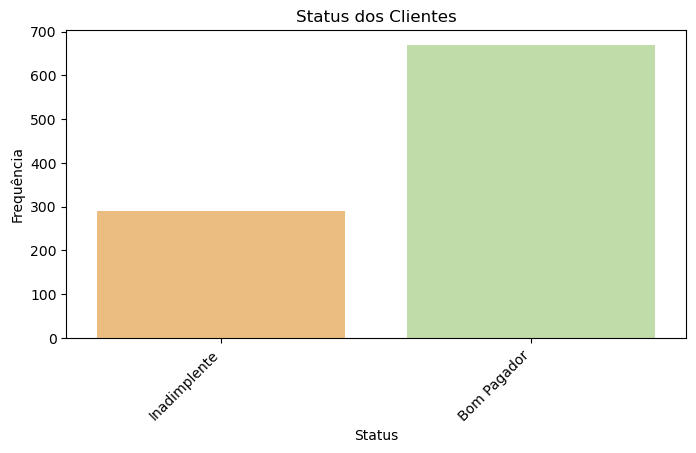

In [21]:
## transformando as variáveis
categoricas['Status'] = dados['Status']

categoricas['Status'] = categoricas['Status'].replace({
                        0 :"Inadimplente",
                        1 : "Bom Pagador"
})

## criando o gráfico de barras para Status
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'Status', data = categoricas, palette = 'Spectral')
_ = plt.title('Status dos Clientes')
_ = plt.xlabel('Status')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

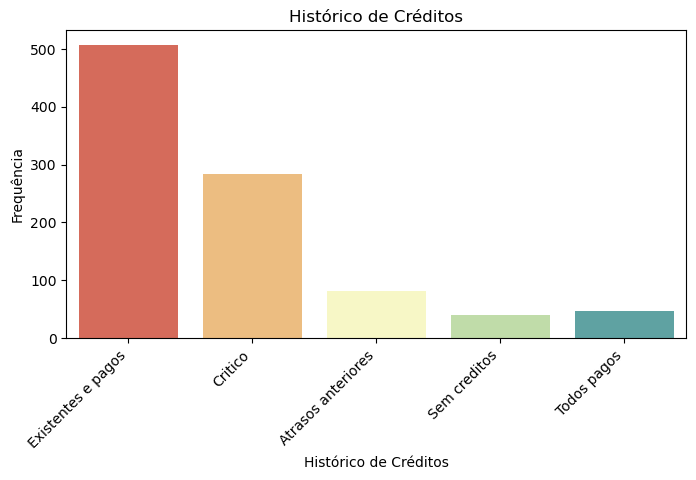

In [22]:
## transformando as variáveis
categoricas['HistoricoCredito'] = dados['HistoricoCredito']

categoricas['HistoricoCredito'] = categoricas['HistoricoCredito'].replace({
                            1 : 'Critico',
                            2 : 'Existentes e pagos',
                            3 : 'Atrasos anteriores',
                            4 : 'Sem creditos',
                            5 : 'Todos pagos'
})

## criando o gráfico de barras para ESTADO CIVIL
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'HistoricoCredito', data = categoricas, palette = 'Spectral')
_ = plt.title('Histórico de Créditos')
_ = plt.xlabel('Histórico de Créditos')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

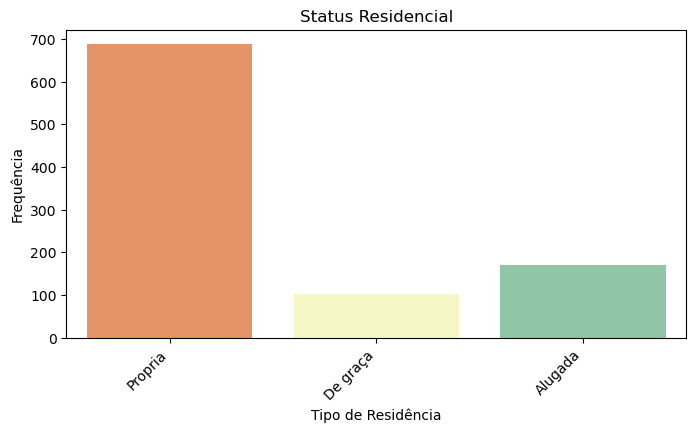

In [23]:
## transformando as variáveis
categoricas['Habitacao'] = dados['Habitacao']

categoricas['Habitacao'] = categoricas['Habitacao'].replace({
                        1 :"Propria",
                        2 : "De graça",
                        3 : "Alugada"                  
})

## criando o gráfico de barras para ESTADO CIVIL
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'Habitacao', data = categoricas, palette = 'Spectral')
_ = plt.title('Status Residencial')
_ = plt.xlabel('Tipo de Residência')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

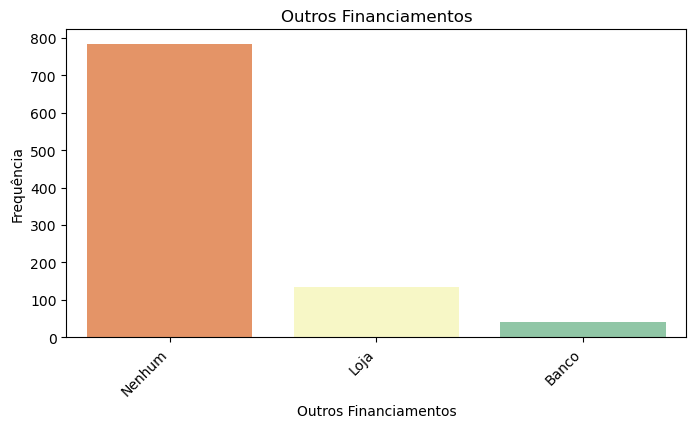

In [24]:
## transformando as variáveis
categoricas['OutrosFinanciamentos'] = dados['OutrosFinanciamentos']

categoricas['OutrosFinanciamentos'] = categoricas['OutrosFinanciamentos'].replace({
                        1 :"Loja",
                        2 : "Banco",
                        3 : "Nenhum"                  
})


## criando o gráfico de barras para ESTADO CIVIL
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'OutrosFinanciamentos', data = categoricas, palette = 'Spectral')
_ = plt.title('Outros Financiamentos')
_ = plt.xlabel('Outros Financiamentos')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

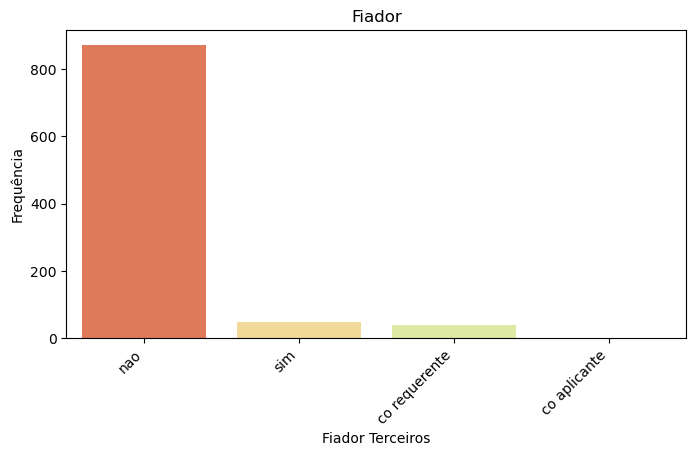

In [25]:
## trazendo os nomes verdadeiros das classes para a variável Fiador
categoricas['FiadorTerceiros'] = dados['FiadorTerceiros']

categoricas['FiadorTerceiros'] = categoricas['FiadorTerceiros'].replace({
                        1 :"co aplicante",
                        2 : "co requerente",
                        3 : "nao",
                        4 : "sim"                    
})

## criando o gráfico de barras para ESTADO CIVIL
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'FiadorTerceiros', data = categoricas, palette = 'Spectral')
_ = plt.title('Fiador')
_ = plt.xlabel('Fiador Terceiros')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

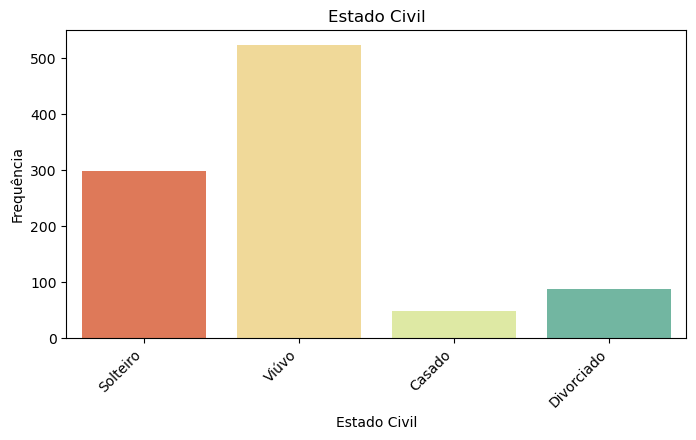

In [26]:
## trazendo os nomes verdadeiros das classes para a variável EstadoCivil
categoricas['EstadoCivil'] = dados['EstadoCivil']

categoricas['EstadoCivil'] = categoricas['EstadoCivil'].replace({
                        1 :"Solteiro",
                        2 : "Casado",
                        3 : "Divorciado",
                        4 : "Viúvo"                    
})

## criando o gráfico de barras para ESTADO CIVIL
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'EstadoCivil', data = categoricas, palette = 'Spectral')
_ = plt.title('Estado Civil')
_ = plt.xlabel('Estado Civil')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

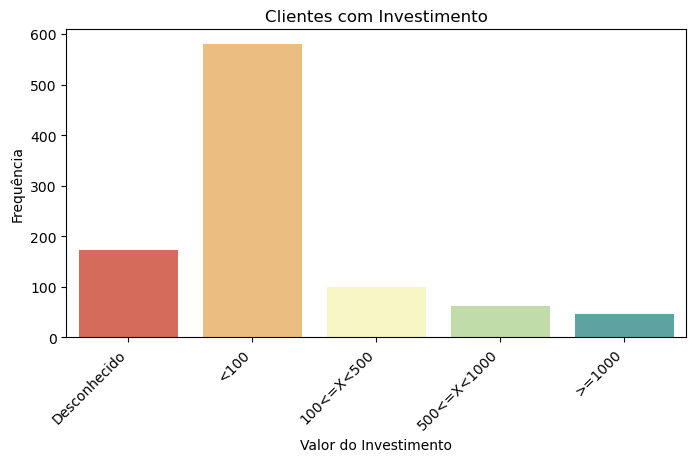

In [27]:
## trazendo os nomes verdadeiros das classes para a variável Investimentos
categoricas['Investimentos'] = dados['Investimentos']

categoricas['Investimentos'] = categoricas['Investimentos'].replace({
                        1 :"Desconhecido",
                        2 : "<100",
                        3 : "500<=X<1000",
                        4 : ">=1000",
                        5 : "100<=X<500"
                       
})

## criando uma ordem para as classes para ficar mais didático
ordem_personalizada = ["Desconhecido", "<100", "100<=X<500" ,"500<=X<1000", ">=1000"]

## Criando o gráfico de barras para Investimento
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'Investimentos', data = categoricas, order = ordem_personalizada, palette = 'Spectral')
_ = plt.title('Clientes com Investimento')
_ = plt.xlabel('Valor do Investimento')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

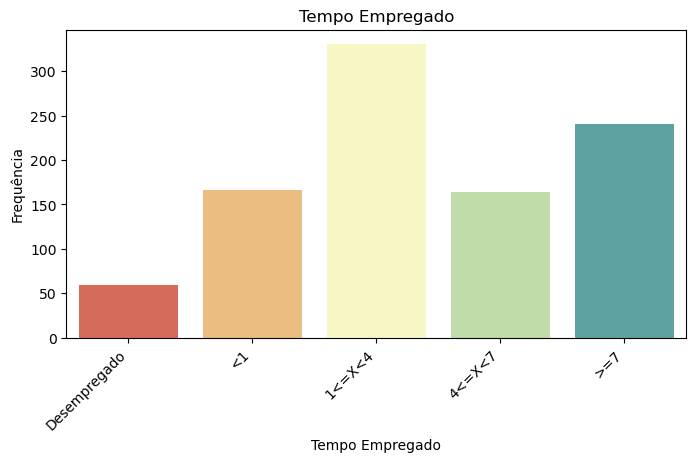

In [28]:
## trazendo os nomes verdadeiros das classes para a variável Emprego
categoricas['Emprego'] = dados['Emprego']

categoricas['Emprego'] = categoricas['Emprego'].replace({
                        1 :"<1",
                        2 : ">=7",
                        3 : "1<=X<4",
                        4 : "4<=X<7",
                        5 : "Desempregado"
                       
})

## criando uma ordem para as classes para ficar mais didático
ordem = ["Desempregado", "<1", "1<=X<4", "4<=X<7", ">=7"]

## Criando o gráfico de barras para EMPREGO
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'Emprego', data = categoricas, order = ordem, palette = 'Spectral')
_ = plt.title('Tempo Empregado')
_ = plt.xlabel('Tempo Empregado')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

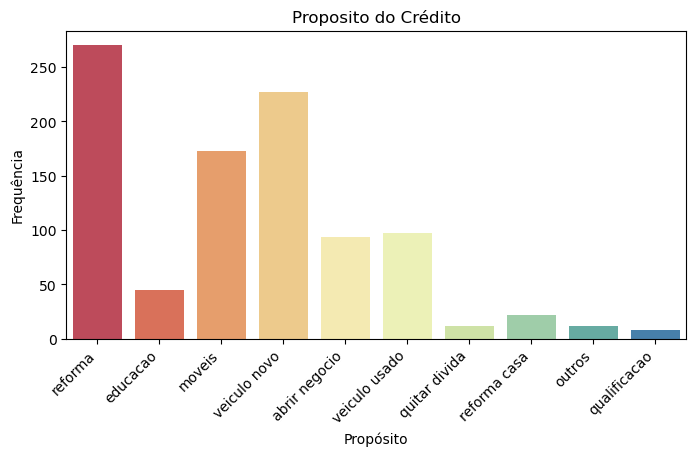

In [29]:
## trazendo os nomes verdadeiros das classes para a variável Proposito
categoricas['Proposito'] = dados['Proposito']

categoricas['Proposito'] = categoricas['Proposito'].replace({
                        1 :"reforma",
                        2 : "educacao",
                        3 : "moveis",
                        4 : "veiculo novo",
                        5 : "veiculo usado",
                        6 : "abrir negocio",
                        7 : "quitar divida",
                        8 : "reforma casa",
                        9 : "outros",
                        10 : "qualificacao"
})

## Criando o gráfico de barras para PROPOSITO
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'Proposito', data = categoricas, palette = 'Spectral')
_ = plt.title('Proposito do Crédito')
_ = plt.xlabel('Propósito')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

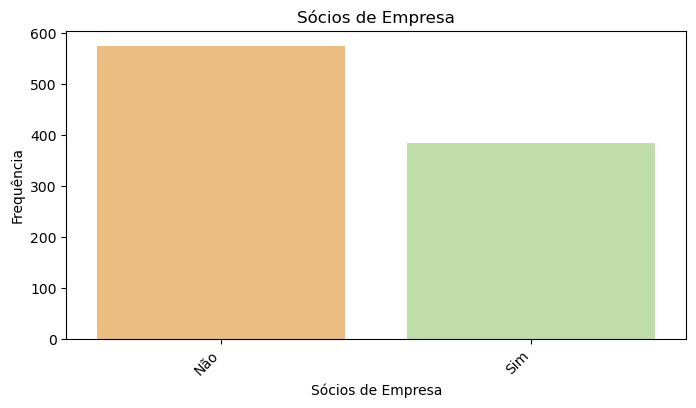

In [30]:
## trazendo os nomes verdadeiros das classes para a variável SocioEmpresa
categoricas['SocioEmpresa'] = dados['SocioEmpresa']

categoricas['SocioEmpresa'] = categoricas['SocioEmpresa'].replace({
                        1 :"Sim",
                        0 : "Não"
})

## Criando o gráfico de barras para Sócio Empresa
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'SocioEmpresa', data = categoricas, palette = 'Spectral')
_ = plt.title('Sócios de Empresa')
_ = plt.xlabel('Sócios de Empresa')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

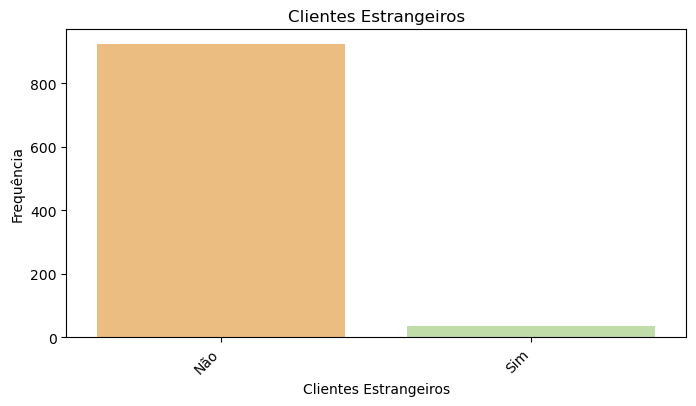

In [31]:
## Transformando as variáveis
categoricas['Estrangeiro'] = dados['Estrangeiro']

categoricas['Estrangeiro'] = categoricas['Estrangeiro'].replace({
                            0 : 'Não',
                            1 : 'Sim'
})

## Criando o gráfico de barras para Sócio Empresa
plt.figure(figsize=(8, 4))
_ = sns.countplot(x = 'Estrangeiro', data = categoricas, palette = 'Spectral')
_ = plt.title('Clientes Estrangeiros')
_ = plt.xlabel('Clientes Estrangeiros')
_ = plt.ylabel('Frequência')
_ = plt.xticks(rotation=45, ha='right')
plt.show()

## 8. Análise Exploratória

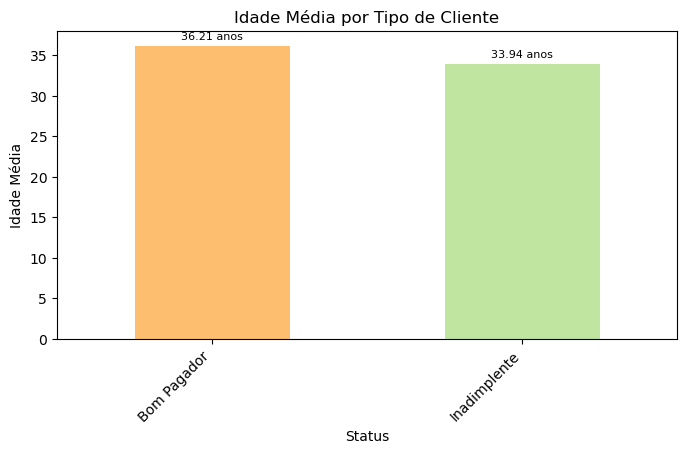

In [33]:
## criando um dataframe contendo a idade média de cada tipo de cliente (status)
idade_media = dados.replace({ 0 :"Inadimplente", 1 : "Bom Pagador"}).groupby('Status')['Idade'].mean()

## obtendo a paleta spectral do sns
paleta_spectral = sns.color_palette('Spectral', n_colors = len(idade_media))

## criando o gráfico de barras 
plt.figure(figsize=(8, 4))
ax = idade_media.plot(kind = 'bar', color = paleta_spectral)

# Adicionando rótulos de texto com os valores exatos das idades médias
for i, v in enumerate(idade_media):
    ax.text(i, v + 0.5, f"{v:.2f} anos", ha='center', va='bottom', fontsize=8, color='black')

plt.title('Idade Média por Tipo de Cliente')
plt.xlabel('Status')
plt.ylabel('Idade Média')
plt.xticks(rotation=45, ha='right')
plt.show()


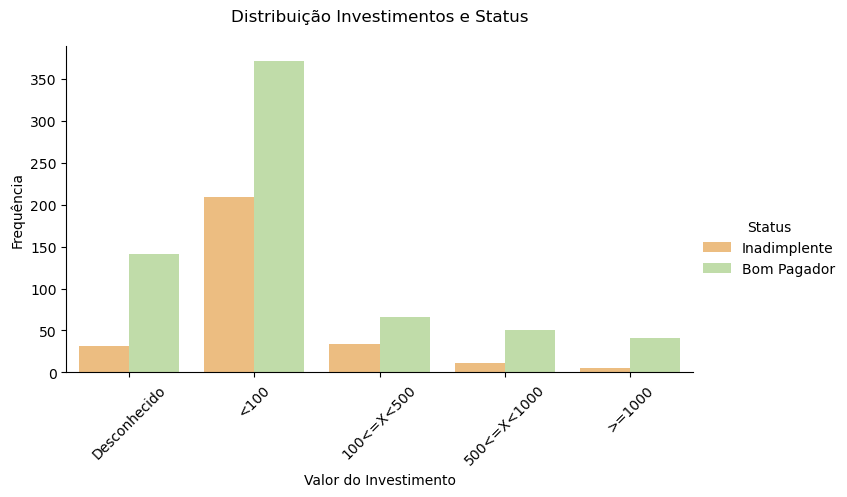

In [34]:
## criando uma ordem para as classes para ficar mais didático
ordem_personalizada = ["Desconhecido", "<100", "100<=X<500" ,"500<=X<1000", ">=1000"]

## Criar o gráfico categórico
sns.catplot(data=categoricas, x='Investimentos', hue='Status', kind='count', height=4, aspect=1.8, order=ordem_personalizada, palette='Spectral')
plt.title('Distribuição Investimentos e Status', y=1.05)
plt.xlabel('Valor do Investimento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

## Exibir o gráfico
plt.show()

- Como podemos ver no gráfico acima a classe de Investimentos que possui maior número de clientes inadimplentes é '< 100'.

- Além disso, podemos notar que as classes 'Desconhecido', '500 <= x < 1000', '>= 1000' possuem uma taxa menor de inadimplência.

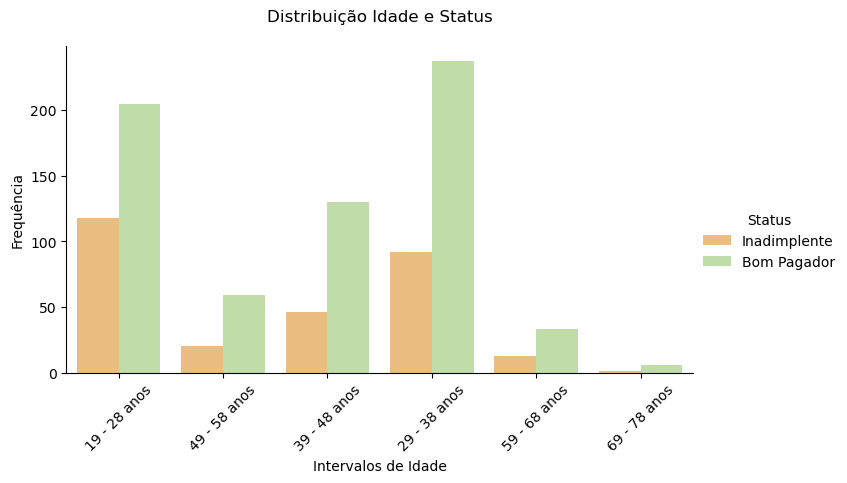

In [36]:
## criando uma função para separar a idade em intervalos
def intervalar(idade):
    if 19 <= idade < 29:
        return '19 - 28 anos' 
    elif 29 <= idade < 39:
        return '29 - 38 anos' 
    elif 39 <= idade < 49:
        return '39 - 48 anos' 
    elif 49 <= idade < 59:
        return '49 - 58 anos' 
    elif 59 <= idade < 69:
        return '59 - 68 anos' 
    elif 69 <= idade < 79:
        return '69 - 78 anos'
    else:
        return 'Fora do Intervalo'


categoricas['Idade'] = dados['Idade'].apply(intervalar)

## criando uma ordem para as classes para ficar mais didático
ordem_personalizada = ['19 - 28 anos', '29 - 38 anos', '39 - 48 anos', '49 - 58 anos', '59 - 68 anos', '69 - 78 anos']

## Criando o gráfico de barras para reforma
sns.catplot(data=categoricas, x='Idade', hue='Status', kind='count', height=4, aspect=1.8, palette='Spectral')
plt.title('Distribuição Idade e Status', y=1.05)
plt.xlabel('Intervalos de Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

## Exibir o gráfico
plt.show()

- A maior taxa de inadimplentes entre os intervalos de idade é o intervalo de 19 à 28 anos.

C:\Users\TutuSurfer\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\TutuSurfer\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\TutuSurfer\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

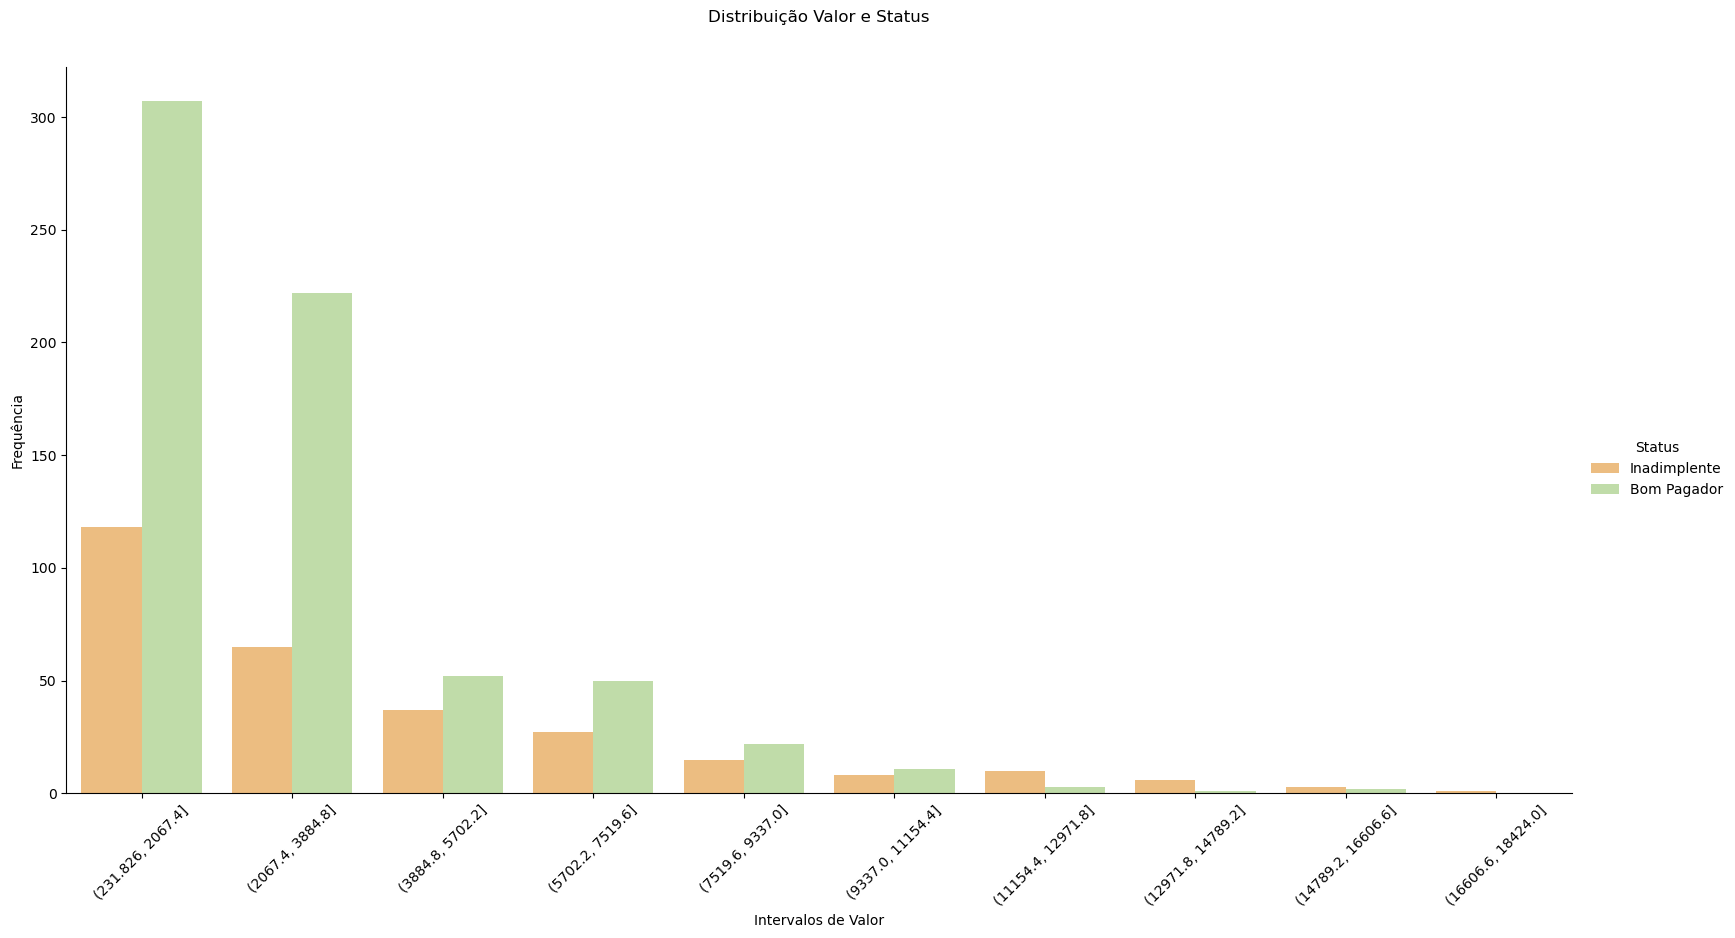

In [38]:
## separando a variável valor em intervalos para ver como se distribui o status nesses intervalos
categoricas['Valor'] = pd.cut(dados['Valor'], bins = 10)

## Criando o gráfico de barras para reforma
sns.catplot(data=categoricas, x='Valor', hue='Status', kind='count', height=8, aspect=2, palette='Spectral')
plt.title('Distribuição Valor e Status', y=1.05)
plt.xlabel('Intervalos de Valor')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

## Exibir o gráfico
plt.show()

- Podemos notar que para valores de crédito abaixo de 3884,80 dólares temos uma taxa de inadimplencia relativamente baixa (aproximadamente 1/3 no primeiro intervalo e 1/4 no segundo intervalo), e que com o aumento do valor do crédito a taxa de inadimplencia aumenta, de modo que a partir de 3.884,80 dólares temos um número de inadimplentes próximo ao número de bons pagadores. E acima de $ 11.154,40 temos mais clientes inadimplentes do que bons pagadores. Desse modo temos um indicativo para prestar mais atenção a clientes que gastam altos valores de crédito.

C:\Users\TutuSurfer\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\TutuSurfer\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\TutuSurfer\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

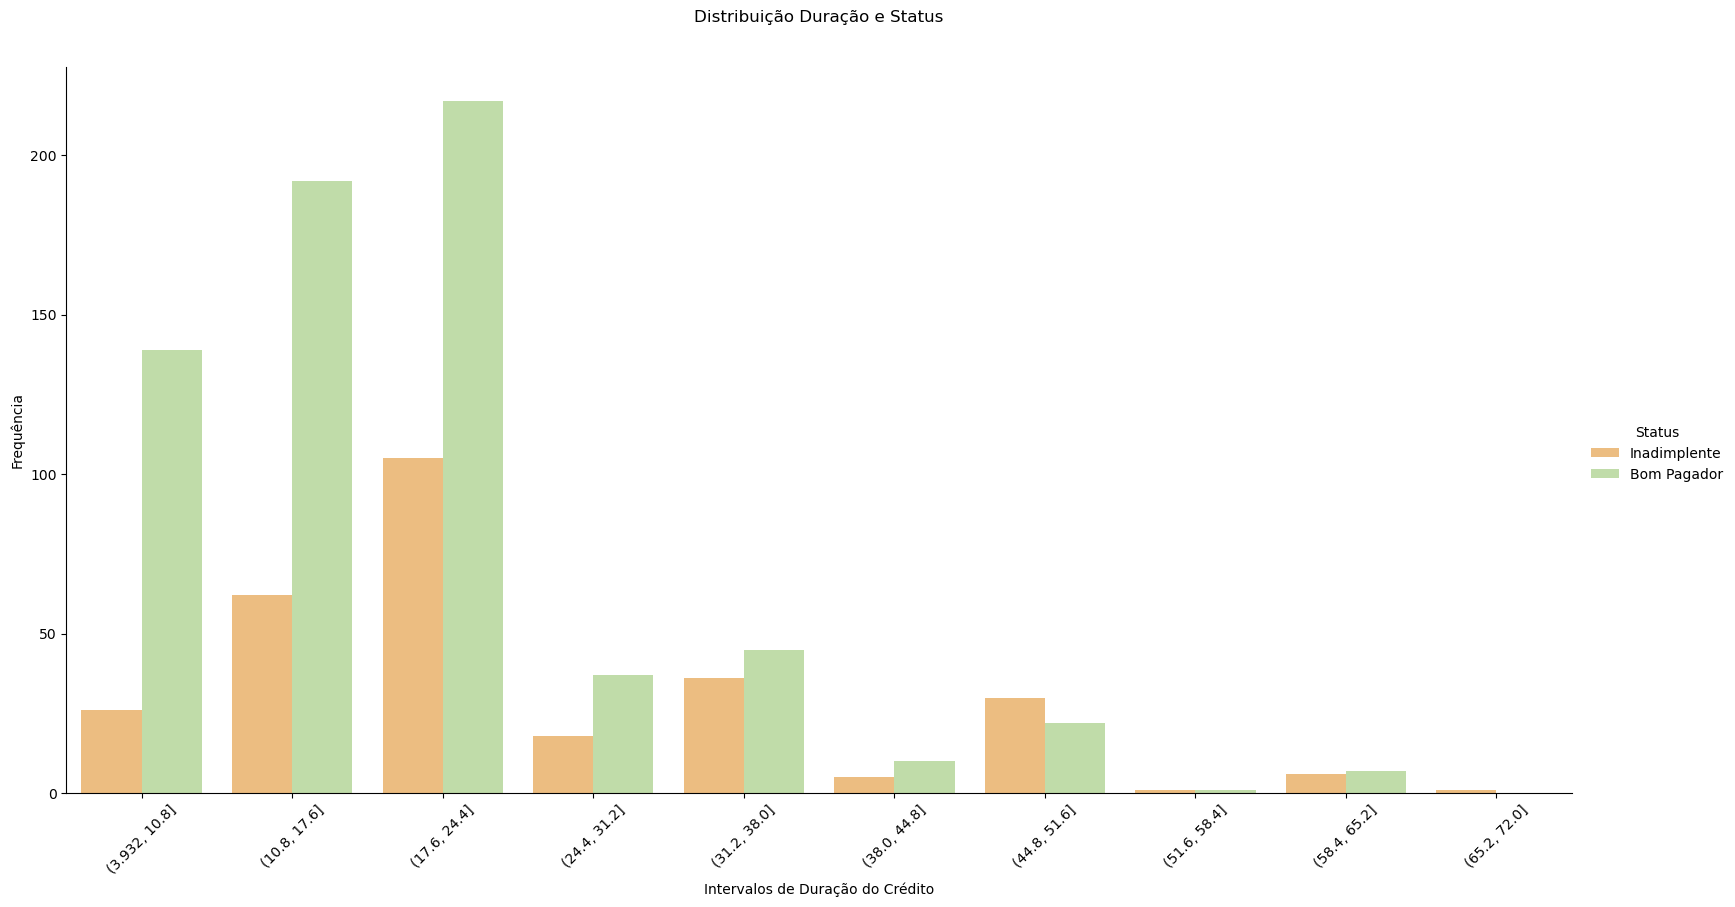

In [40]:
## separando a variável valor em intervalos para ver como se distribui o status nesses intervalos
categoricas['Duracao'] = pd.cut(dados['Duracao'], bins = 10)

## Criando o gráfico de barras para reforma
sns.catplot(data=categoricas, x='Duracao', hue='Status', kind='count', height=8, aspect=2, palette='Spectral')
plt.title('Distribuição Duração e Status', y=1.05)
plt.xlabel('Intervalos de Duração do Crédito')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

## Exibir o gráfico
plt.show()

- Como podemos notar os intervalos de duração de crédito com maior taxa de inadimplentes são entre 44,8 à 51,6 meses e 65,2 à 72 meses.

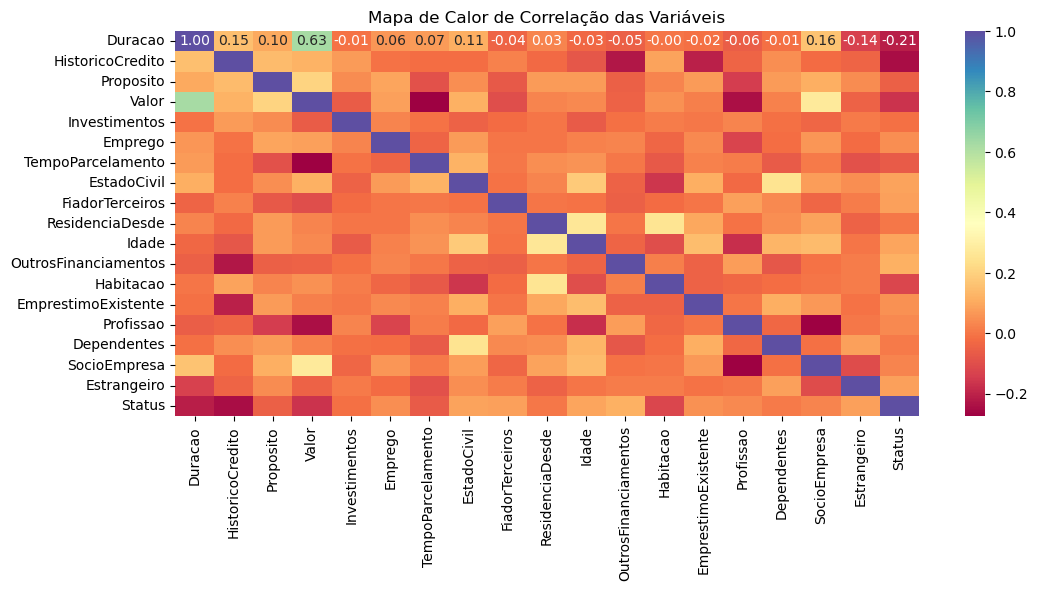

In [42]:
## criando a matriz de correlação das variável
cor_matrix = dados.corr()

## criando um gráfico de calor 
plt.figure(figsize = (12, 5))
sns.heatmap(cor_matrix, annot = True, cmap='Spectral', fmt=".2f")
plt.title('Mapa de Calor de Correlação das Variáveis')
plt.show()

- Apenas as variáveis 'Valor' e 'Duração' tem correlação forte (positiva).

## 9. Separando os dados entre treino e teste

In [47]:
## dividindo os dados das classes
x = dados.drop(columns = ['Status'])
y = dados['Status']

## dividindo os dados para treino e teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25, random_state=42)

In [48]:
## verificando o balanceamento das classes
print(y_treino.value_counts())

Status
1    502
0    218
Name: count, dtype: int64


- Como podemos verificar, a classe 1 (Bom Pagador) possui mais que o dobro de observações do que a classe 2 (Inadimplente), que é a classe alvo de nossa análise.

- Ter classes desbalanceadas tornará o modelo muito mais eficiente para achar a classe dominante, o que para o nosso caso representa um problema, pois o nosso foco está na classe 'Inadimplente' que representa apenas cerca de 30% das observações.

- Por tanto, para tornar o nosso modelo o melhor possível iremos balancear as classes.

- Para balancear as classes iremos aplicar o método SMOTE que cria amostras sintéticas para a classe minoritária. Estou escolhendo utilizar esse método com base no baixo número de observações que possuímos, deste modo se escolhesse um método de sub amostragem (melhorar essa parte) ficaríamos com apenas 290 amostras para treinar nosso modelo.

In [50]:
## balanceando as classes
smote = SMOTE(random_state=42)
x_treino_smote, y_treino_smote = smote.fit_resample(x_treino, y_treino)

## verificando se deu certo
print(y_treino_smote.value_counts())

Status
1    502
0    502
Name: count, dtype: int64


- Como podemos ver, utilizando a função SMOTE temos agora temos 1004 observações de treino ao invés de 720, o que gerará um desempenho melhor dos modelos de machine learning.

  
- Agora com as classes balanceadas irei normalizar os dados, pois variáveis em escalas diferentes podem levar a trajetórias de otimização mais complexas e demoradas. Além de que quando temos uma ou mais variáveis explicativas com uma escala muito maior do que as demais, ela pode influenciar desproporcionalmente o resultado final, levando a um modelo que se concentra mais nessa feature, independentemente e sua importância real.

In [52]:
## normalizando as características
normal = StandardScaler()
x_treino_smote = normal.fit_transform(x_treino_smote)
x_teste_normal = normal.transform(x_teste)

## 10. Realizando os testes de Validação Cruzada para decidir com qual modelo de Machine Learning seguir trabalhando.

In [54]:
## criando um dataframe para armazenar as métricas que serão utilizadas para comparar os modelos
metricas_df = pd.DataFrame(columns=['Modelo', 'Taxa Inadimplência', 'Acurácia', 'Revocação', 'AUC-ROC'])

## criando a função para calcular as métricas
def calcular_metricas(nome_modelo, y_teste, y_pred, y_pred_prob):
    acuracia = accuracy_score(y_teste, y_pred)
    relatorio = classification_report(y_teste, y_pred, target_names= ['Classe 0', 'Classe 1'], output_dict=True)
    revocacao = relatorio['weighted avg']['recall']
    auc_roc = roc_auc_score(y_teste, y_pred_prob)
    cm = confusion_matrix(y_teste, y_pred)
    taxa_inadimplencia = cm[0, 1] / (cm[0, 1] + cm[1, 1])
    
    return pd.Series([nome_modelo, taxa_inadimplencia, acuracia, revocacao, auc_roc], 
                     index=['Modelo', 'Taxa Inadimplência', 'Acurácia', 'Revocação', 'AUC-ROC'])

In [55]:
## inicialiazndo o modelo de Gradient Boosting Machines
gbm = GradientBoostingClassifier(random_state = 42)

## criando o DataFrame para armazenar os resultados de validação cruzada
resultados_cv_df = pd.DataFrame(columns=['Modelo', 'Média', 'Desvio Padrão'])

# Função para calcular os scores de validação cruzada e adicionar ao DataFrame
def armazenar_resultados_cv(nome_modelo, scores):
    # Calcula a média e o desvio padrão dos scores
    media_scores = scores.mean()
    desvio_padrao_scores = scores.std()
    
    return pd.Series([nome_modelo, media_scores, desvio_padrao_scores], 
                           index=['Modelo','Média', 'Desvio Padrão'])
    
## realizando a validação cruzada com 5 folds
cv_gbm = cross_val_score(gbm, x_treino_smote, y_treino_smote, cv = 5, scoring = 'accuracy')

## adicionando os resultados da validação cruzada ao dataframe de resultados para depois compara-los 
resultados_cv_df = pd.concat([resultados_cv_df, armazenar_resultados_cv('Gradient Boosting Machines', cv_gbm).to_frame().T], ignore_index=True)

In [56]:
## inicialiazndo o modelo de Random Forest
rf = RandomForestClassifier(random_state = 42)

## realizando a validação cruzada com 5 folds
cv_rf = cross_val_score(rf, x_treino_smote, y_treino_smote, cv = 5, scoring = 'accuracy')

## adicionando os resultados da validação cruzada ao dataframe de resultados para depois compara-los 
resultados_cv_df = pd.concat([resultados_cv_df, armazenar_resultados_cv('Random Forest', cv_rf).to_frame().T], ignore_index=True)

In [57]:
## inicialiazndo o modelo de Extreme Gradient Boosting
xgb = XGBClassifier(random_state = 42)

## realizando a validação cruzada com 5 folds
cv_xgb = cross_val_score(xgb, x_treino_smote, y_treino_smote, cv = 5, scoring = 'accuracy')

## adicionando os resultados da validação cruzada ao dataframe de resultados para depois compara-los 
resultados_cv_df = pd.concat([resultados_cv_df, armazenar_resultados_cv('Extreme Gradiente Boosting', cv_xgb).to_frame().T], ignore_index=True)

## verificando o resultado das validações cruzadas
resultados_cv_df

,Modelo,Média,Desvio Padrão
0,Gradient Boosting Machines,0.747119,0.125162
1,Random Forest,0.786955,0.092012
2,Extreme Gradiente Boosting,0.76904,0.11697


- Como os três modelos tiveram uma acurácia média próxima, irei testar os três modelos e também irei aplicar a busca de melhores hiperparametros para os três modelos antes de decidir qual deles irei utilizar.

## 11. Treinando os modelos com hiperparâmetros básicos

In [60]:
## treinando o Modelo Gradient Boosting Machines
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(x_treino_smote, y_treino_smote)

## realizando as previsões
y_pred_gbm = gbm.predict(x_teste_normal)
y_pred_prob_gbm = gbm.predict_proba(x_teste_normal)[:, 1]

## criando as matrizes de confusão
cm_gbm = confusion_matrix(y_teste, y_pred_gbm)

## calculando métricas para Gradient Boosting
metricas_df = pd.concat([metricas_df, calcular_metricas('Gradient Boosting', y_teste, y_pred_gbm, y_pred_prob_gbm).to_frame().T], ignore_index=True)

In [61]:
## treinando o Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_treino_smote, y_treino_smote)

## realizando as previsões
y_pred_rf = rf.predict(x_teste_normal)
y_pred_prob_rf = rf.predict_proba(x_teste_normal)[:, 1]

## gerando a matriz de confusão
cm_rf = confusion_matrix(y_teste, y_pred_rf)

## calculando as métricas do Random Forest
metricas_df = pd.concat([metricas_df, calcular_metricas('Random Forest', y_teste, y_pred_rf, y_pred_prob_rf).to_frame().T], ignore_index=True)

In [62]:
## treinando o Extreme Gradient Boost
xgb = XGBClassifier(random_state = 42)
xgb.fit(x_treino_smote, y_treino_smote)

## realizando as previsões
y_pred_xgb = xgb.predict(x_teste_normal)
y_pred_prob_xgb = xgb.predict_proba(x_teste_normal)[:, 1]

## gerando a matriz de confusão
cm_xgb = confusion_matrix(y_teste, y_pred_xgb)  

## calculando as métricas do Random Forest
metricas_df = pd.concat([metricas_df, calcular_metricas('Extreme Gradient Boost', y_teste, y_pred_xgb, y_pred_prob_xgb).to_frame().T], ignore_index=True)


In [63]:
## visualizando as métricas dos modelos sem tunar os hiperparâmetros.
metricas_df

,Modelo,Taxa Inadimplência,Acurácia,Revocação,AUC-ROC
0,Gradient Boosting,0.22093,0.7,0.7,0.766204
1,Random Forest,0.222222,0.695833,0.695833,0.721478
2,Extreme Gradient Boost,0.210227,0.725,0.725,0.733135


- O modelo Extreme Gradient Boost alcançou a menor taxa de inadimplencia

## 12. Verificando a importância das variáveis explicativas.

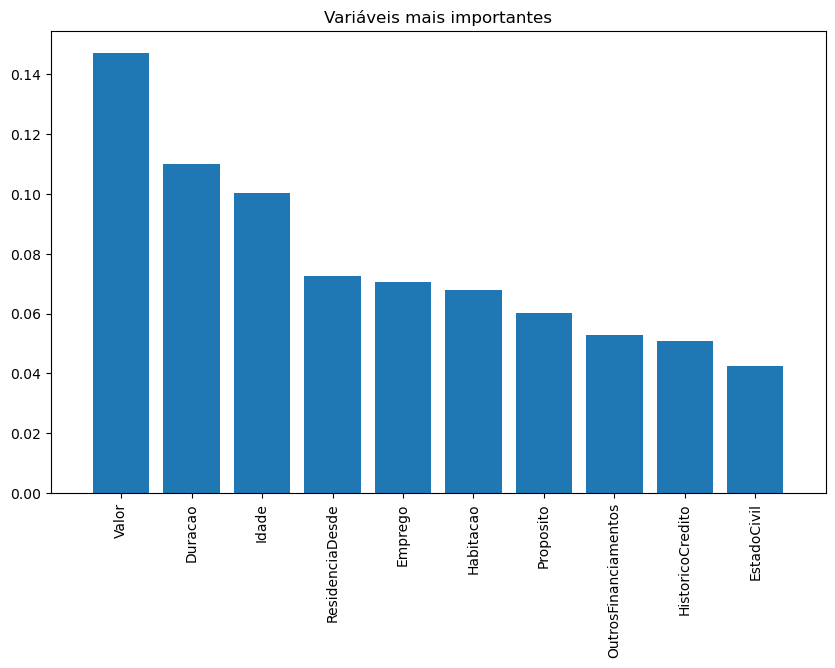

In [66]:
## utlizando 'feature importances' do RandomForest para verificar quais são as variáveis mais importantes para explicar as variações em 'Status'
importancia = rf.feature_importances_
indices = np.argsort(importancia)[::-1]

## criando um objeto com os nomes das colunas 
nomes_colunas = x_treino.columns

## definindo o número de variáveis mais importantes
num_variaveis_importantes = 10

## selecionando as principais variáveis
top_indices = indices[:num_variaveis_importantes]
top_importancia = importancia[top_indices]
top_variaveis = [nomes_colunas[i] for i in top_indices]

## plotando a importância das 10 principais variáveis
plt.figure(figsize = (10,6))
plt.title('Variáveis mais importantes')
plt.bar(range(num_variaveis_importantes), top_importancia, align = 'center')
plt.xticks(range(num_variaveis_importantes), top_variaveis, rotation = 90)
plt.xlim([-1, num_variaveis_importantes])
plt.show()

## 13. Tunando os hiperparâmetros dos modelos

In [ ]:
## Definir o modelo
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definir o espaço de busca dos hiperparâmetros
param_dist = {
      'n_estimators':range(0,200,50),
    'max_depth':[1, 3, 5],
    'min_child_weight':[1, 3, 6],
    'gamma':[0, 1, 5],
}

def calculando_inadimplencia(y_teste, y_pred):
    cm = confusion_matrix(y_teste, y_pred)
    taxa_inadimplencia = cm[0, 1] / (cm[0, 1] + cm[1, 1])
    return taxa_inadimplencia

## criando uma pontuação para a taxa de inadimplencia utilizando make_scorer
scorer = make_scorer(calculando_inadimplencia, greater_is_better=False)

## implementando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring=scorer,
    cv=5,
    verbose=2,
    random_state=42,
)

## rodando o RandomizedSearchCV
random_search.fit(x_treino_smote, y_treino_smote)

## visualizando os melhores hiperparâmetros
print('Melhores Hiperparâmetros encontrados:')
print(random_search.best_params_)

## avaliando o modelo com os melhores parametros no conjunto de teste
best_xgb = random_search.best_estimator_

## fazendo as previsões no conjunto de teste
y_pred_best_xgb = best_xgb.predict(x_teste_normal)
y_pred_prob_best_xgb = best_xgb.predict_proba(x_teste_normal)[:, 1]

## calculando a matriz de confusão
cm_best_xgb = confusion_matrix(y_teste, y_pred_best_xgb)

## calculando as métricas do Random Forest
metricas_df = pd.concat([metricas_df, calcular_metricas('XGB Tunado', y_teste, y_pred_best_xgb, y_pred_prob_best_xgb).\
                         to_frame().T], ignore_index=True)

In [ ]:
## definindo a grade de hiperparâmetros para buscar
grade_parametros = {
    'n_estimators': [int(x) for x in range(100, 1001, 50)],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'loss': ['deviance', 'exponential']
}


## criando uma pontuação para a taxa de inadimplencia utilizando make_scorer
scorer = make_scorer(calculando_inadimplencia, greater_is_better=False)


## definindo o modelo
gbm2 = GradientBoostingClassifier(random_state=42)

## configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = gbm2,
    param_distributions = grade_parametros,
    n_iter = 100,  # Número de combinações de hiperparâmetros a serem testadas
    cv = 5,        # Número de folds para validação cruzada
    verbose = 2,
    random_state = 42,
    scoring=scorer
)

## rodando o RandomizedSearchCV
random_search.fit(x_treino_smote, y_treino_smote)

## visualizando os melhores hiperparâmetros
print('Melhores Hiperparâmetros encontrados:')
print(random_search.best_params_)

## avaliando o modelo no conjunto de teste
best_gbm = random_search.best_estimator_

## fazendo as previsões no conjunto de teste
y_pred_best_gbm = best_gbm.predict(x_teste_normal)
y_pred_prob_best_gbm = best_gbm.predict_proba(x_teste_normal)[:, 1]

## calculando a matriz de confusão
cm_best_gbm = confusion_matrix(y_teste, y_pred_best_gbm)

## calculando as métricas do Random Forest
metricas_df = pd.concat([metricas_df, calcular_metricas('GBM Tunado', y_teste, y_pred_best_gbm, y_pred_prob_best_gbm)\
                         .to_frame().T], ignore_index=True)

In [ ]:
## iniciando o modelo
best_rf = RandomForestClassifier(random_state=42)

## definindo a grade de hiperparâmetros para busca aleatória
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

## criando uma pontuação para a taxa de inadimplencia utilizando make_scorer
scorer = make_scorer(calculando_inadimplencia, greater_is_better=False)

## configurando a RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=best_rf, 
                                   param_distributions=param_grid, 
                                   n_iter=100, 
                                   cv=3, 
                                   random_state=42,
                                   verbose=2,
                                   scoring=scorer)
                                   

## ajustando o modelo
random_search.fit(x_treino_smote, y_treino_smote)

## melhor combinação de hiperparâmetros
print("Melhores Hiperparâmetros:", random_search.best_params_)

## avaliando o modelo no conjunto de teste
best_rf = random_search.best_estimator_

## fazendo as previsões no conjunto de teste
y_pred_best_rf = best_rf.predict(x_teste_normal)
y_pred_prob_best_rf = best_rf.predict_proba(x_teste_normal)[:, 1]

## calculando a matriz de confusão
cm_best_rf = confusion_matrix(y_teste, y_pred_best_rf)

## calculando as métricas do Random Forest
metricas_df = pd.concat([metricas_df, calcular_metricas('RF Tunado', y_teste, y_pred_best_rf, y_pred_prob_best_rf)\
                         .to_frame().T], ignore_index=True)

## 14. Visualizando o resultado dos modelos

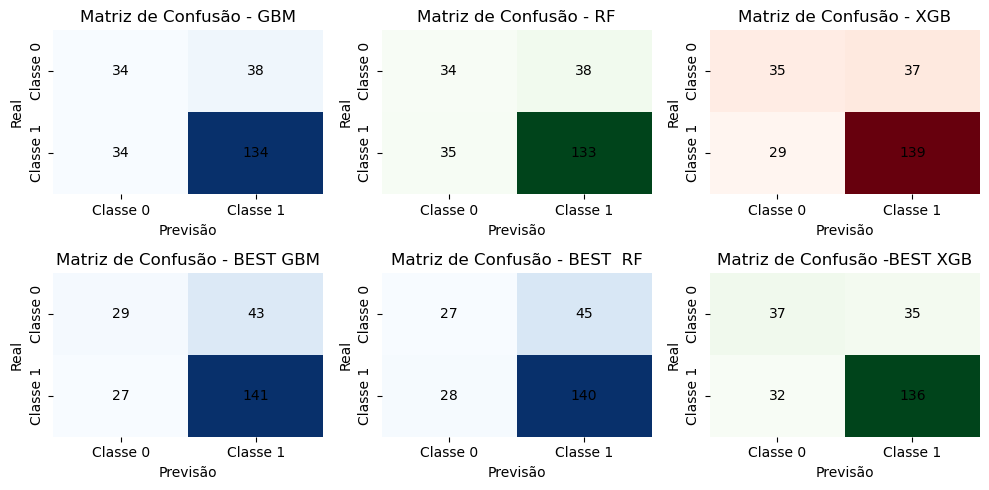

In [81]:
## configuração da figura com 3 subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

## criando a função para anotar as células com texto preto
def annotate_heatmap(ax, cm):
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j + 0.5, i + 0.5, format(cm[i, j], 'd'), ha="center", va="center", color="black")


## plotando a matriz de Confusão do Gradient Boosting Machines 
sns.heatmap(cm_gbm, annot=False, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'], ax=axes[0, 0], cbar=False)
annotate_heatmap(axes[0, 0], cm_gbm)
axes[0, 0].set_xlabel('Previsão')
axes[0, 0].set_ylabel('Real')
axes[0, 0].set_title('Matriz de Confusão - GBM')


## plotando a matriz de Confusão do Random Forest
sns.heatmap(cm_rf, annot=False, fmt='d', cmap='Greens', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'], ax=axes[0, 1], cbar=False)
annotate_heatmap(axes[0, 1], cm_rf)
axes[0, 1].set_xlabel('Previsão')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_title('Matriz de Confusão - RF')

## plotando a matriz de Confusão de Extreme Gradient Boosting
sns.heatmap(cm_xgb, annot=False, fmt='d', cmap='Reds', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'], ax=axes[0, 2], cbar=False)
annotate_heatmap(axes[0, 2], cm_xgb)
axes[0, 2].set_xlabel('Previsão')
axes[0, 2].set_ylabel('Real')
axes[0, 2].set_title('Matriz de Confusão - XGB')

## plotando a matriz de Confusão do GBM Tunado
sns.heatmap(cm_best_gbm, annot=False, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'], ax=axes[1, 0], cbar=False)
annotate_heatmap(axes[1, 0], cm_best_gbm)
axes[1, 0].set_xlabel('Previsão')
axes[1, 0].set_ylabel('Real')
axes[1, 0].set_title('Matriz de Confusão - BEST GBM')

## plotando a matriz de Confusão do Random Forest Tunado
sns.heatmap(cm_best_rf, annot=False, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'], ax=axes[1, 1], cbar=False)
annotate_heatmap(axes[1, 1], cm_best_rf)
axes[1, 1].set_xlabel('Previsão')
axes[1, 1].set_ylabel('Real')
axes[1, 1].set_title('Matriz de Confusão - BEST  RF')

## plotando a matriz de Confusão do XGB Tunado
sns.heatmap(cm_best_xgb, annot=False, fmt='d', cmap='Greens', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'], ax=axes[1, 2], cbar=False)
annotate_heatmap(axes[1, 2], cm_best_xgb)
axes[1, 2].set_xlabel('Previsão')
axes[1, 2].set_ylabel('Real')
axes[1, 2].set_title('Matriz de Confusão -BEST XGB')

## ajustnado o layout
plt.tight_layout()
plt.show()

In [83]:
## visualizando o resultado dos modelos
metricas_df

,Modelo,Taxa Inadimplência,Acurácia,Revocação,AUC-ROC
0,Gradient Boosting,0.22093,0.7,0.7,0.766204
1,Random Forest,0.222222,0.695833,0.695833,0.721478
2,Extreme Gradient Boost,0.210227,0.725,0.725,0.733135
3,XGB Tunado,0.204678,0.720833,0.720833,0.721396
4,GBM Tunado,0.233696,0.708333,0.708333,0.734375
5,RF Tunado,0.243243,0.695833,0.695833,0.709325


## 15. Conclusão:

- Como o objetivo da instituição era reduzir a taxa de inadimplência  de seus clientes o modelo de Machine Learning que será implementado é o Extreme Gradient Boost Tunado com os hiperparâmetros gerados pelo RandomSearchCV, que obteve uma taxa de inadimplência de 20,47%, superando a expectativa do cliente que era de 25%.